<a href="https://colab.research.google.com/github/saniya1-709/OIBSIP/blob/main/Predicting_House_Prices_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading The Dataset**

In [2]:
file_path = "/content/Housing.csv"
housing_data = pd.read_csv(file_path)


## **Encoding categorical variables**

In [3]:
label_encoders = {}
for col in housing_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    housing_data[col] = le.fit_transform(housing_data[col])
    label_encoders[col] = le

## **Exploratory Data Analysis (EDA)**


### **Correlation Heatmap**

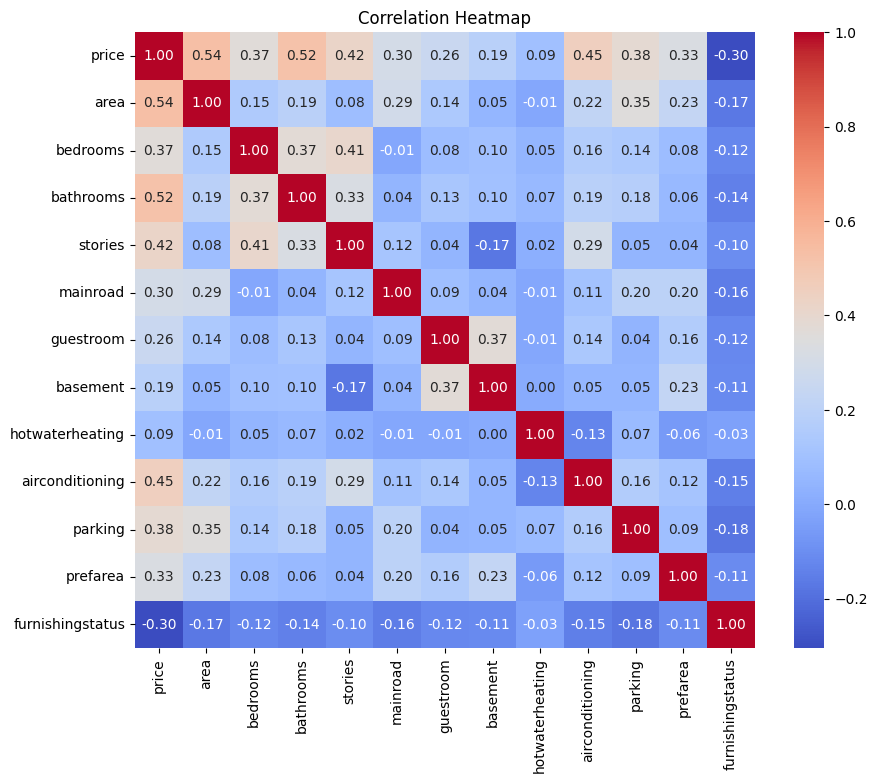

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Defining features (X) and target (y)**

In [5]:
X = housing_data.drop(columns=['price'])
y = housing_data['price']

## **Feature Scaling**

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Splitting the dataset into training and testing sets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Training a basic Linear Regression model**

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## **Predicting and evaluating Linear Regression**

In [10]:
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

## **Visualization:**
Actual vs Predicted prices (Linear Regression)

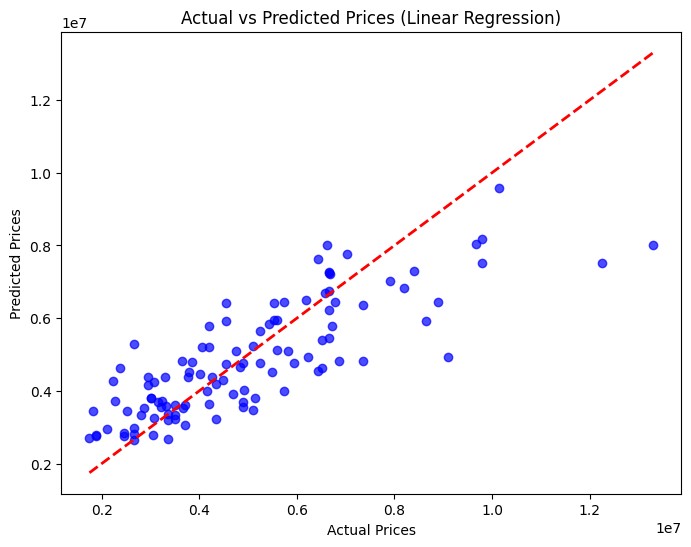

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

## **Training Ridge and Lasso Regression models**

In [13]:
ridge_model = Ridge(alpha=1.0)  # Adjusting alpha for Ridge
lasso_model = Lasso(alpha=1.0)  # Adjusting alpha for Lasso

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso()

## **Predicting and evaluating Ridge and Lasso**

In [14]:
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

## **Printing The Results**

In [15]:
print("Linear Regression:")
print(f"MSE: {linear_mse}, R²: {linear_r2}")

print("\nRidge Regression:")
print(f"MSE: {ridge_mse}, R²: {ridge_r2}")

print("\nLasso Regression:")
print(f"MSE: {lasso_mse}, R²: {lasso_r2}")

Linear Regression:
MSE: 1771751116594.04, R²: 0.6494754192267793

Ridge Regression:
MSE: 1772261478130.596, R²: 0.6493744489144322

Lasso Regression:
MSE: 1771752846723.9949, R²: 0.6494750769365607
